# Exploración de los datos

In [1]:
import pandas as pd
df = pd.read_csv('Datos/data.csv', delimiter = ",", low_memory=False).astype(str)

In [2]:
df.head(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,nan,-99.1402149999999,19.3803149998337,nan
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,nan,-99.1084029999999,19.3528589998337,nan
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,nan,UNIDAD VICENTE GUERRERO,IZTAPALAPA,nan,-99.061321,19.3564509998336,nan


In [3]:
from io import StringIO

col = ['fiscalia','delito','longitud','latitud']
df = df[col]
df['fiscalia'] = df['fiscalia'].str.capitalize()
df['delito'] = df['delito'].str.capitalize()

df.columns = ['fiscalia','delito', 'longitud','latitud']


df['category_fiscalia'] = df['fiscalia'].factorize()[0]
category_id_df = df[['fiscalia', 'category_fiscalia']].drop_duplicates().sort_values('category_fiscalia')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_fiscalia', 'fiscalia']].values)

df['category_delito'] = df['delito'].factorize()[0]
category_id_df = df[['delito', 'category_delito']].drop_duplicates().sort_values('category_delito')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_delito', 'delito']].values)



df.head(10)

,fiscalia,delito,longitud,latitud,category_fiscalia,category_delito
0,Investigación en benito juárez,Daño en propiedad ajena intencional,-99.1402149999999,19.3803149998337,0,0
1,Investigación para la atención del delito de r...,Robo de vehiculo de servicio particular con vi...,-99.1084029999999,19.3528589998337,1,1
2,"Investigación para la atención de niños, niñas...",Narcomenudeo posesion simple,-99.061321,19.3564509998336,2,2
3,Investigación en iztapalapa,Robo a transeunte en via publica con violencia,-98.9763790000001,19.3316329998333,3,3
4,Investigación en benito juárez,Denuncia de hechos,-99.1721889999999,19.387113999834,0,4
5,Investigación en cuauhtemoc,Lesiones culposas por transito vehicular en co...,-99.1740749999999,19.4213559998338,4,5
6,Investigación en tlahuac,Lesiones intencionales,-99.001595,19.2798639998343,5,6
7,Investigación en benito juárez,Fraude,-99.1734799999999,19.3949179998331,0,7
8,Investigación en benito juárez,Fraude,-99.1734799999999,19.3949179998331,0,7
9,Investigación en cuauhtemoc,Violencia familiar,-99.1264509999999,19.3992729998338,4,8


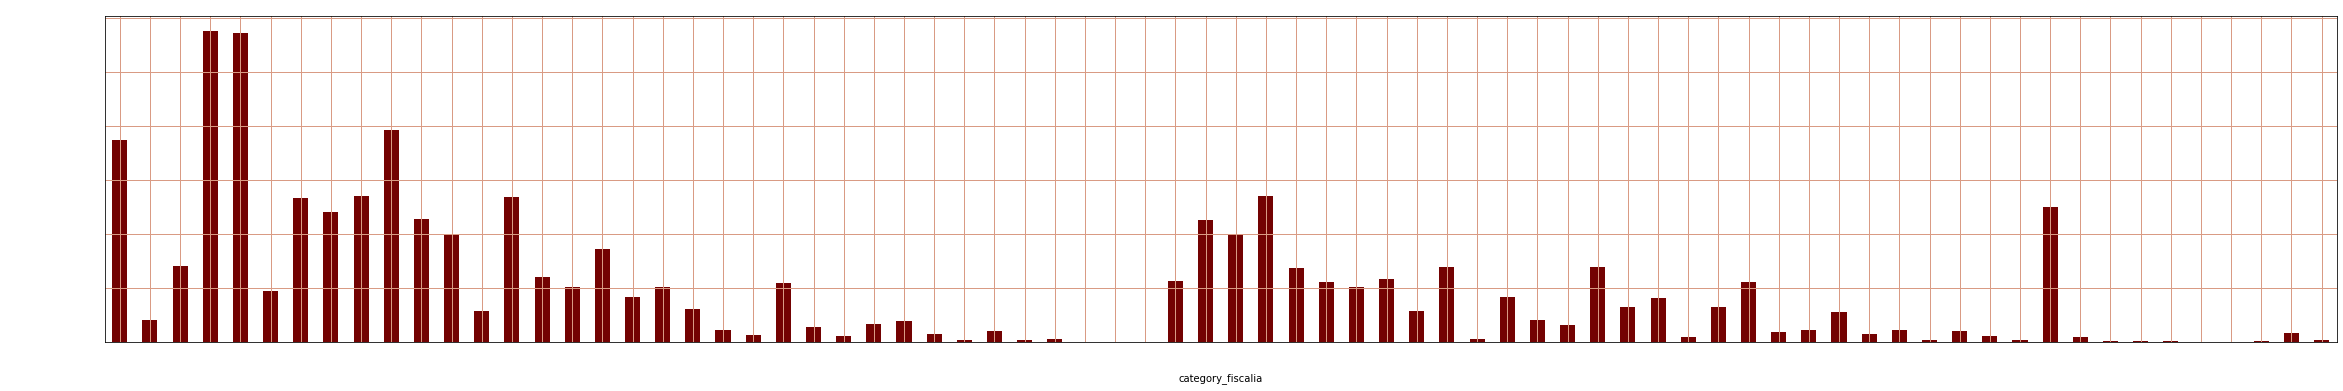

In [4]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,6))
ax = plt.axes()

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='white')


# df.groupby('fiscalia').fiscalia.count().plot.bar(ylim=0,color="#730202")
df.groupby('category_fiscalia').fiscalia.count().plot.bar(ylim=0,color="#730202")

plt.rc('font',family='Times New Roman')
plt.xticks(fontsize=20, rotation=90, family='Times New Roman')
plt.yticks(fontsize=30, family='Times New Roman')
plt.grid(color = '#D99B84', linewidth = 1)

plt.savefig("1.png", transparent=True)


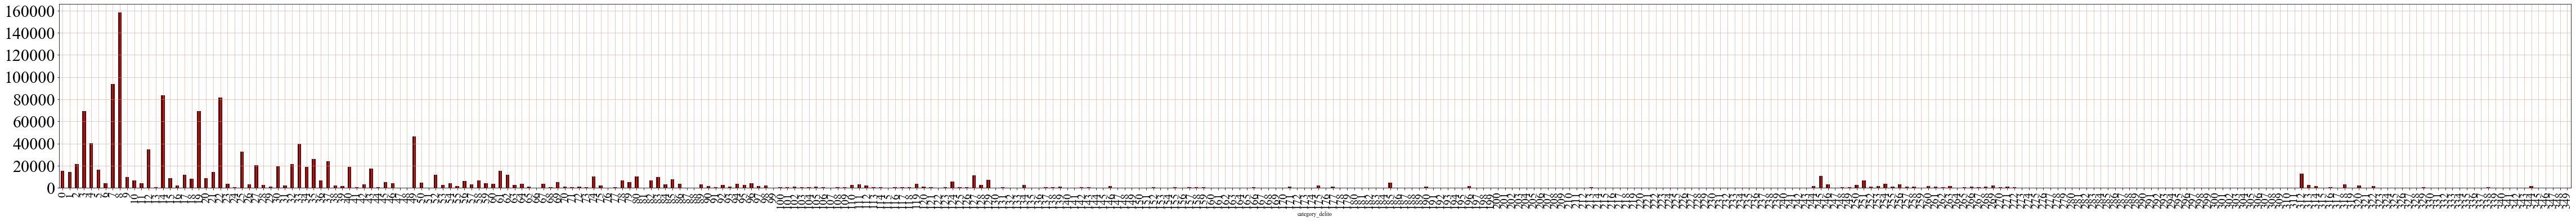

In [16]:
fig = plt.figure(figsize=(80,6))
ax = plt.axes()

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')


df.groupby('category_delito').delito.count().plot.bar(ylim=0,color="#730202")

plt.rc('font',family='Times New Roman')
plt.xticks(fontsize=20, rotation=90, family='Times New Roman')
plt.yticks(fontsize=30, family='Times New Roman')
plt.grid(color = '#D99B84', linewidth = .5)

plt.savefig("1.png", transparent=True)

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitud, df.latitud))
tracts = gpd.GeoDataFrame(gdf)
print('Observations, Attributes:',tracts.shape)
tracts.head()

Observations, Attributes: (1442353, 7)


,fiscalia,delito,longitud,latitud,category_fiscalia,category_delito,geometry
0,Investigación en benito juárez,Daño en propiedad ajena intencional,-99.1402149999999,19.3803149998337,0,0,POINT (-99.14021 19.38031)
1,Investigación para la atención del delito de r...,Robo de vehiculo de servicio particular con vi...,-99.1084029999999,19.3528589998337,1,1,POINT (-99.10840 19.35286)
2,"Investigación para la atención de niños, niñas...",Narcomenudeo posesion simple,-99.061321,19.3564509998336,2,2,POINT (-99.06132 19.35645)
3,Investigación en iztapalapa,Robo a transeunte en via publica con violencia,-98.9763790000001,19.3316329998333,3,3,POINT (-98.97638 19.33163)
4,Investigación en benito juárez,Denuncia de hechos,-99.1721889999999,19.387113999834,0,4,POINT (-99.17219 19.38711)


In [25]:
gdf[gdf['category_fiscalia']==1]

,fiscalia,delito,longitud,latitud,category_fiscalia,category_delito,geometry
1,Investigación para la atención del delito de r...,Robo de vehiculo de servicio particular con vi...,-99.1084029999999,19.3528589998337,1,1,POINT (-99.10840 19.35286)
77,Investigación para la atención del delito de r...,Encubrimiento,-99.0989949999999,19.4166769998331,1,36,POINT (-99.09899 19.41668)
573,Investigación para la atención del delito de r...,Fraude,-99.1672339999999,19.4168729998336,1,7,POINT (-99.16723 19.41687)
610,Investigación para la atención del delito de r...,Robo de vehiculo de servicio público sin viole...,-99.1356379999999,19.2960639998335,1,67,POINT (-99.13564 19.29606)
775,Investigación para la atención del delito de r...,Encubrimiento,-99.023634,19.3821909998338,1,36,POINT (-99.02363 19.38219)
...,...,...,...,...,...,...,...
931018,Investigación para la atención del delito de r...,Robo de vehiculo de servicio público sin viole...,-99.0612394544634,19.3197479681957,1,67,POINT (-99.06124 19.31975)
931236,Investigación para la atención del delito de r...,Encubrimiento,-99.2018013621297,19.4332738315582,1,36,POINT (-99.20180 19.43327)
931444,Investigación para la atención del delito de r...,Encubrimiento,-99.1271582368556,19.4590224501371,1,36,POINT (-99.12716 19.45902)
931472,Investigación para la atención del delito de r...,Encubrimiento,-99.0795392319232,19.3822913218492,1,36,POINT (-99.07954 19.38229)


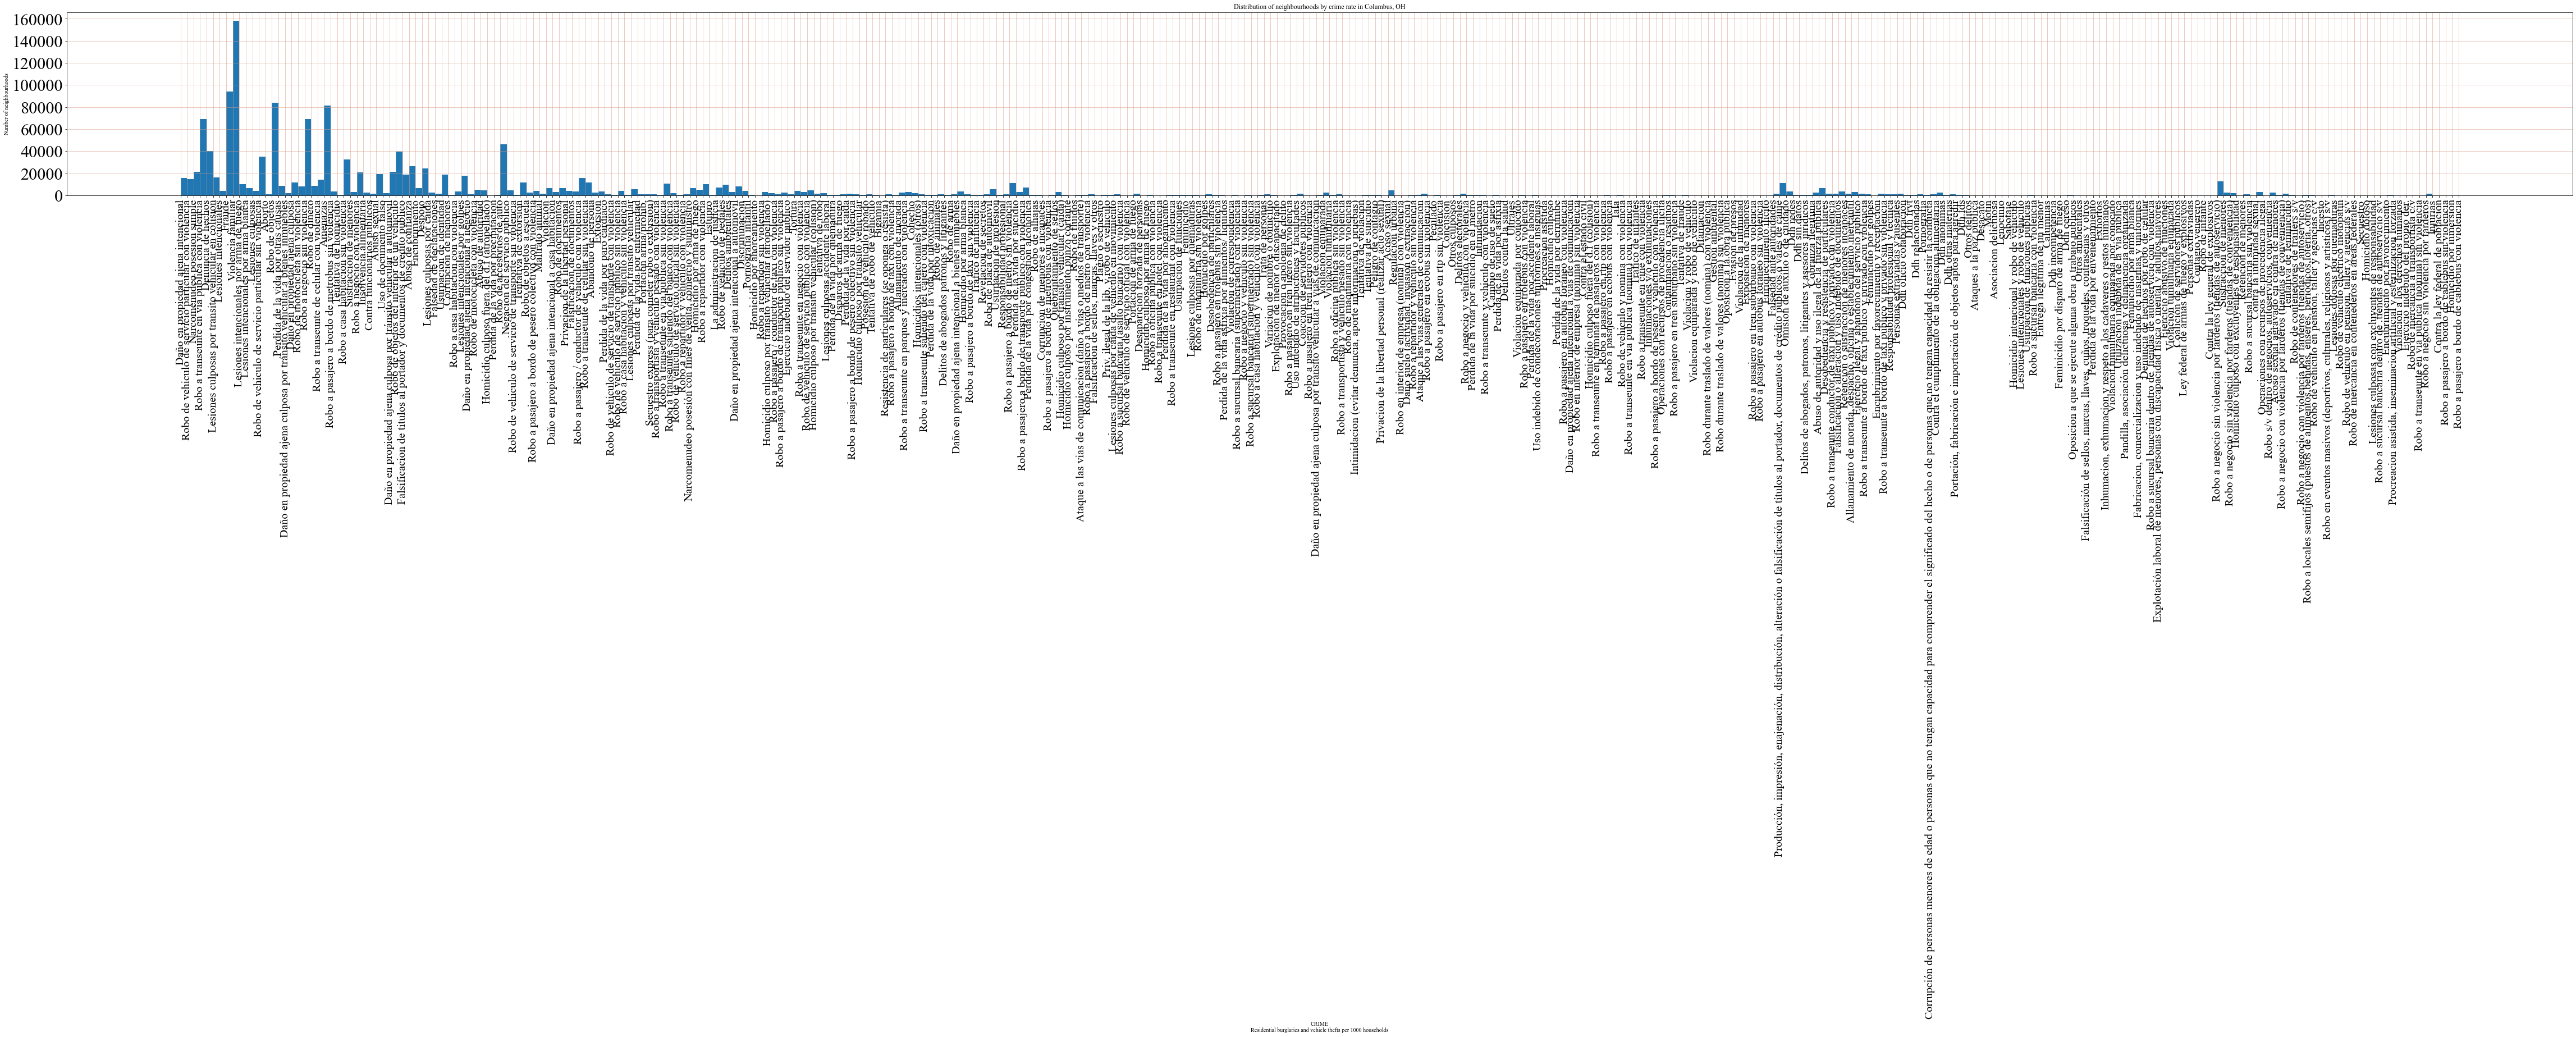

In [18]:
# Let's take a look at how the CRIME variable is distributed with a histogram
fig = plt.figure(figsize=(80,6))
ax = plt.axes()

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')

tracts['delito'].hist(bins=349)
plt.xlabel('CRIME\nResidential burglaries and vehicle thefts per 1000 households')
plt.ylabel('Number of neighbourhoods')
plt.title('Distribution of neighbourhoods by crime rate in Columbus, OH')

plt.rc('font',family='Times New Roman')
plt.xticks(fontsize=20, rotation=90, family='Times New Roman')
plt.yticks(fontsize=30, family='Times New Roman')
plt.grid(color = '#D99B84', linewidth = .5)
plt.show()

<AxesSubplot:>

<Figure size 5760x432 with 0 Axes>

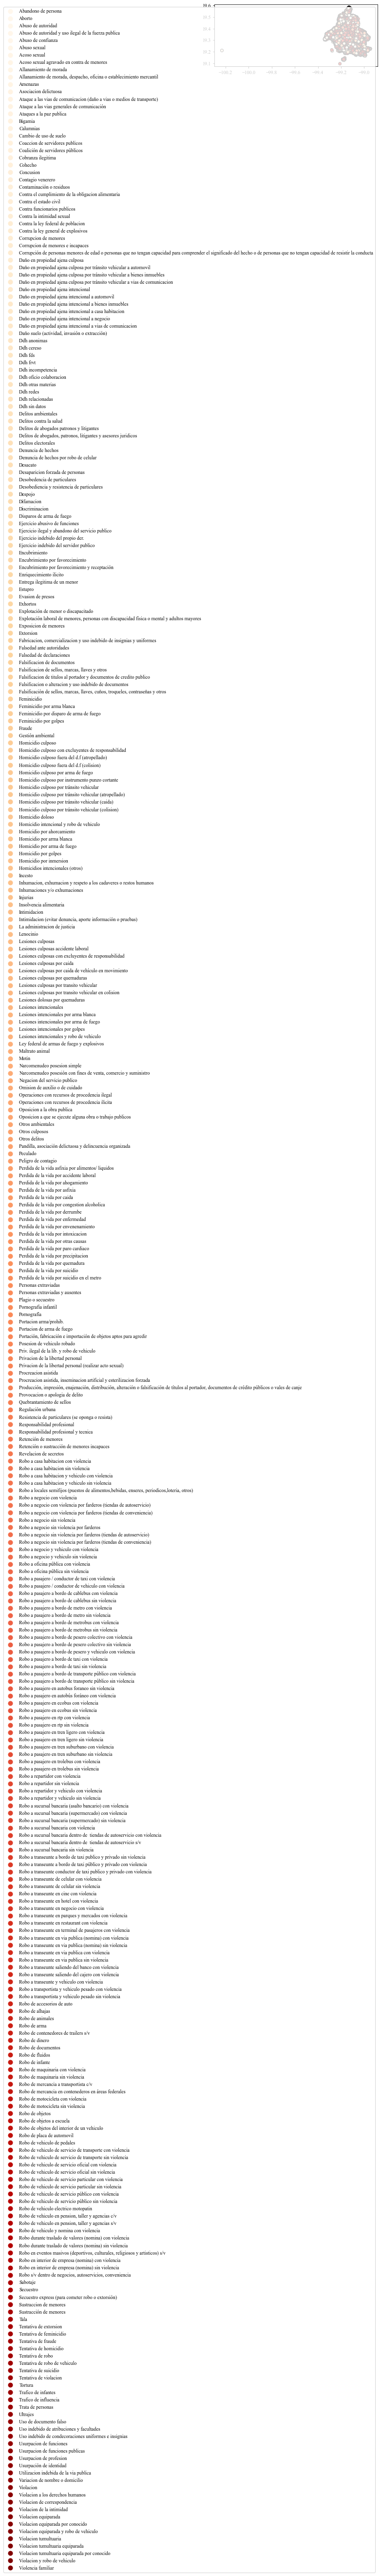

In [26]:
fig = plt.figure(figsize=(80,6))
tracts.plot(column='delito', cmap='OrRd', edgecolor='k', legend=True)


KeyError: 'delitos'

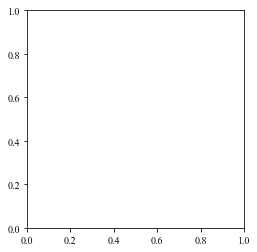

In [27]:
ax = gdf.plot(column='delitos', categorical=True, legend=True, 
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}) # fmt is ignored for categorical data